In [1]:
from cnn_blur_detection import MotionBlurDetectionCNN
import matplotlib.pyplot as plt
from visualisations import mask_on_image, roc_pr_rec_plots, confusion_matrix, show_scores
from data_preparation import get_evaluation_data

# Results
## CNN

In [2]:
cnn = MotionBlurDetectionCNN()
cnn.load_model('motionblur_v1.h5')
# cnn.train_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 96)        14208     
_________________________________________________________________
activation (Activation)      (None, 24, 24, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 96)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
activation_1 (Activation)    (None, 8, 8, 256)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 256)         0

In [3]:
t = cnn.test()

570/570 [==============================] - 38s 67ms/step - loss: 0.3616 - accuracy: 0.8775

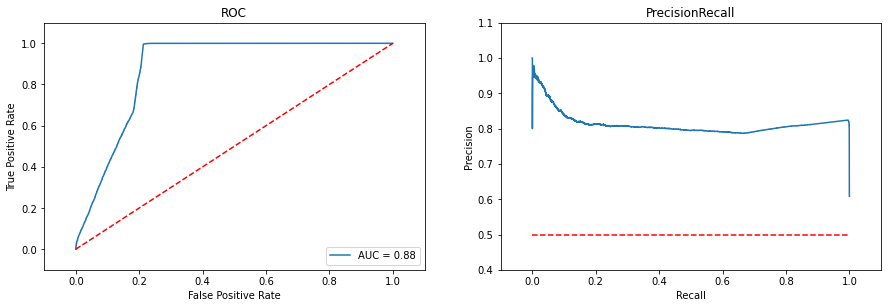

In [3]:
X_test, y_test = cnn.validation_generator.get_all()
y_probs, y_pred = cnn.predict_crops(X_test)
roc_pr_rec_plots(y_test, y_pred, y_probs)

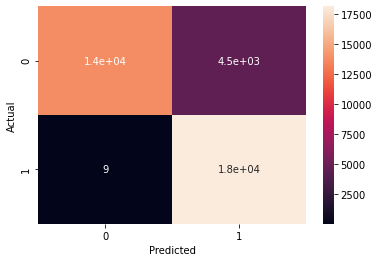

In [4]:
confusion_matrix(y_test, y_pred)

In [5]:
show_scores(y_test, y_pred, "CNN")


    CNN metrics:
          Accuracy: 	0.876510067114094
          Precision: 	0.8013511126810314
          Recall: 	0.9995043506994162
          F1 score: 	0.889526050090673
          


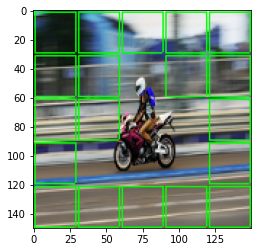

In [6]:
img_path = './data/real/motorcycle.png'
p = cnn.predict(img_path)
plt.imshow(mask_on_image(img_path, p))

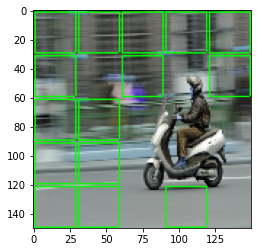

In [7]:
img_path = './data/real/scooter.jpg'
p = cnn.predict(img_path)
plt.imshow(mask_on_image(img_path, p))


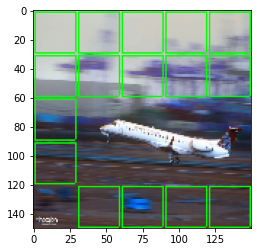

In [8]:
img_path = './data/real/plane.jpg'
p = cnn.predict(img_path)
plt.imshow(mask_on_image(img_path, p))

# Nao dataset validation

In [3]:
X_nao, y_nao = get_evaluation_data(n_imgs=10000)

100%|██████████| 10000/10000 [02:01<00:00, 82.16it/s]


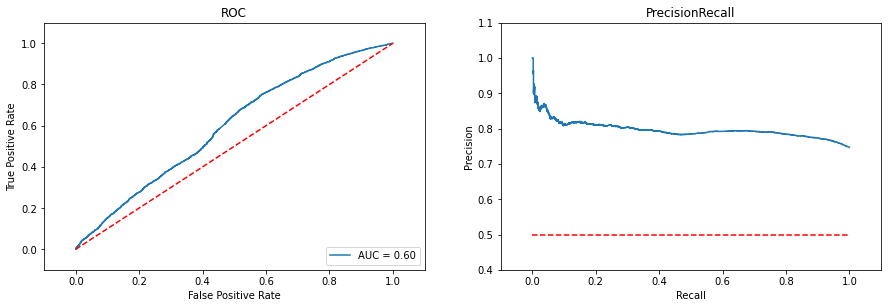

In [4]:
y_probs_nao, y_pred_nao = cnn.predict_crops(X_nao)
roc_pr_rec_plots(y_nao, y_pred_nao, y_probs_nao)

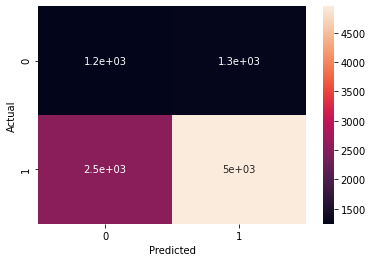

In [5]:
confusion_matrix(y_nao, y_pred_nao)

In [6]:
show_scores(y_nao, y_pred_nao, "CNN evaluation of NAO dataset\n\t")


    CNN evaluation of NAO dataset
	 metrics:
          Accuracy: 	0.6194
          Precision: 	0.7936507936507936
          Recall: 	0.6627393225331369
          F1 score: 	0.7223113964686998
          
